## This is a dataset describing some important indicators of a country. We will try to understand this data and discover some interesting things. So let's dive into the analysis.

In [3]:
#  importing libraries

import pandas as pd               # dealing with the data
import seaborn as sns             # for visualisation
import numpy as np                # for numerical computation
import matplotlib.pyplot as plt   # for visualisation

# for showing plot in jupyter notebook
%matplotlib inline

In [4]:
# loading and reading data

data_path = r"C:\Users\Asus\OneDrive\Documents\Data science  (complete)\Datasets\countries-of-the-world\countries of the world.csv"
data = pd.read_csv(data_path)

In [5]:
# seeing the data

data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [6]:
data.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [7]:
data.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

## Check for missing values

In [8]:

for col in data.columns:
    print(col  , (data[col].isnull().sum()/len(data[col])*100 ))
    

Country 0.0
Region 0.0
Population 0.0
Area (sq. mi.) 0.0
Pop. Density (per sq. mi.) 0.0
Coastline (coast/area ratio) 0.0
Net migration 1.3215859030837005
Infant mortality (per 1000 births) 1.3215859030837005
GDP ($ per capita) 0.4405286343612335
Literacy (%) 7.929515418502203
Phones (per 1000) 1.762114537444934
Arable (%) 0.881057268722467
Crops (%) 0.881057268722467
Other (%) 0.881057268722467
Climate 9.691629955947137
Birthrate 1.3215859030837005
Deathrate 1.762114537444934
Agriculture 6.607929515418502
Industry 7.048458149779736
Service 6.607929515418502


## As we can see that maximum percentage of missing values is 9.7 

In [9]:
data = data.fillna(0)

In [10]:
for col in data.columns:
    print(col  , (data[col].isnull().sum()/len(data[col])*100 ))

Country 0.0
Region 0.0
Population 0.0
Area (sq. mi.) 0.0
Pop. Density (per sq. mi.) 0.0
Coastline (coast/area ratio) 0.0
Net migration 0.0
Infant mortality (per 1000 births) 0.0
GDP ($ per capita) 0.0
Literacy (%) 0.0
Phones (per 1000) 0.0
Arable (%) 0.0
Crops (%) 0.0
Other (%) 0.0
Climate 0.0
Birthrate 0.0
Deathrate 0.0
Agriculture 0.0
Industry 0.0
Service 0.0


## As the names of some columns are not favourable with the typing purpose, so let's make them favourable

In [11]:
new_column_name = {'Area (sq. mi.)':'Area' , 'Pop. Density (per sq. mi.)':'Pop_density' , 
                  'Coastline (coast/area ratio)':'Coastline' , 
                  'Infant mortality (per 1000 births)':'Infant_mortality' , 'GDP ($ per capita)':'GDP_per_capita' ,
                  'Literacy (%)':'Literacy_percent' , 'Phones (per 1000)':'Phones_per_k' , 'Arable (%)':'Arable' ,
                   'Crops (%)':'Crops' ,'Other (%)':'Other'}
data = data.rename(columns = new_column_name )

In [12]:
data.head()

,Country,Region,Population,Area,Pop_density,Coastline,Net migration,Infant_mortality,GDP_per_capita,Literacy_percent,Phones_per_k,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",0,0,0
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",0,0,0


## Now we can see there are many numeric values in various columns which are not in the correct format. So let's make them correct.

In [13]:
def replace_commas(columns):
    for col in columns:
        data[col] = data[col].astype(str)
        dat = []
        for val in data[col]:
            val = val.replace(',' , '.')
            val = float(val)
            dat.append(val)

        data[col] = dat
    return(data.head())

In [15]:
columns = data[['Pop_density' , 'Coastline' , 'Net migration' , 'Infant_mortality' , 
                   'Literacy_percent' , 'Phones_per_k' , 'Arable' , 'Crops' , 'Other' , 'Birthrate' , 'Deathrate' , 'Agriculture' ,
                   'Industry' , 'Service']]
replace_commas(columns)

,Country,Region,Population,Area,Pop_density,Coastline,Net migration,Infant_mortality,GDP_per_capita,Literacy_percent,Phones_per_k,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2,22.46,3.27,0.000,0.000,0.000
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3,8.71,6.25,0.000,0.000,0.000


## Now let's see that which are the top 5 countries with high GDP per capita

In [21]:
data.sort_values(by = 'GDP_per_capita' , ascending = False).Country.iloc[0:5]

121        Luxembourg 
154            Norway 
214     United States 
22            Bermuda 
38     Cayman Islands 
Name: Country, dtype: object

## Infant mortality rate ->It is the number of deaths per 1,000 live births of children under one ## year of age. 

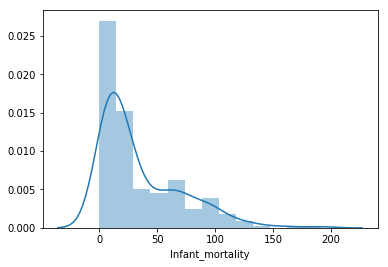

In [28]:
sns.distplot(data.Infant_mortality)

## As we can see that most of the countries have IMR below 100

## Now let's see which countries have the highest IMR and which region they belong to?

In [30]:
data.sort_values(by = 'Infant_mortality' , ascending = False).Country.iloc[0:5]

5            Angola 
0       Afghanistan 
183    Sierra Leone 
142      Mozambique 
117         Liberia 
Name: Country, dtype: object

In [32]:
data.sort_values(by = 'Infant_mortality' , ascending = False).Region.iloc[0:5]

5      SUB-SAHARAN AFRICA                 
0            ASIA (EX. NEAR EAST)         
183    SUB-SAHARAN AFRICA                 
142    SUB-SAHARAN AFRICA                 
117    SUB-SAHARAN AFRICA                 
Name: Region, dtype: object

## Top 4 countries with highest IMR belong to sub-saharan african region

## Now let's try to find the relationship between IMR and GDP per capita of that country

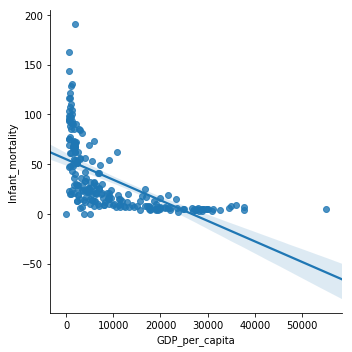

In [33]:
sns.lmplot(x = 'GDP_per_capita' , y = 'Infant_mortality' , data = data)

## As it can be inferred by looking at the scatterplot that there is a good enough relation between the IMR and per capita GDP of the country. And the relation is Negative.

## Let's try to understand this relation more with the help of hexplot

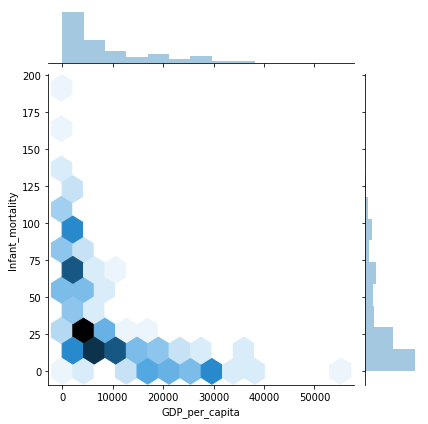

In [34]:
sns.jointplot(x = 'GDP_per_capita' , y = 'Infant_mortality' , kind = 'hex' , data = data)

## From the hexplot we can see that many lower IMR values corresponds to lower per capita GDP. Hence we can conclude that negative relation between the above two variables is not that strong.